# 19기 KNN 정규세션 과제

---

- User_ID : 고객 ID
- Product_ID : 제품 ID
- Age : 고객 연령대
- Occupation : 고객 직업
- City_Category : 고객 거주 도시
- Stay_In_Current_City_Years : 현재 도시 거주 기간(년)
- Marital_Status : 결혼 여부
- Product_Category_1 : 구매 제품 분류(대)
- Product_Category_2 : 구매 제품 분류(중)
- Product_Category_3 : 구매 제품 분류(소)
- Purchase : 구매 가격

In [370]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

np.random.seed(2023)
%matplotlib inline


In [371]:
df = pd.read_csv("blackfriday.csv", index_col = 0)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413


# EDA 및 결측치 확인
- Product_Category_2는 결측치 보간
- Product_Category_3는 결측이 너무 커서 보간이 불가능할 것으로 판단 -> 삭제 ,User_id , Product_id 삭제
- Target : Gender(남자 0, 여자 1)
- 범주 컬럼 : Occupation, Matarial_status, Product_Category_1, Product_Category_2

### Product_Category_2

In [372]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

<AxesSubplot: xlabel='Product_Category_2', ylabel='count'>

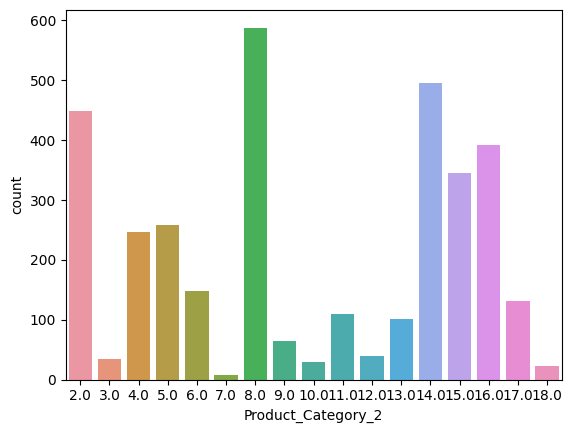

In [373]:
sns.countplot(x='Product_Category_2',data=df)

In [374]:
# Product_ID를 앞4자리까지만 남겨서 간소화
for i in range(len(df)):
    df.loc[i,'Product_ID'] = df.Product_ID[i][:4]

In [375]:
temp1=df.Product_ID.unique()
temp1.sort()
temp1

array(['P000', 'P001', 'P002', 'P003', 'P009'], dtype=object)

In [376]:
# 최빈값 산출 P000 = 14.0, P001 = 2.0, P002 = 8.0, P003 = 8.0, P009 = 4.0
for i in temp1 : 
    print('Product_id : ', i)
    print(df[df['Product_ID']==i].Product_Category_2.value_counts())
    print() 

Product_id :  P000
14.0    189
16.0    130
2.0     129
8.0     108
4.0      79
15.0     76
5.0      74
6.0      45
13.0     28
17.0     27
11.0     10
9.0       7
3.0       5
12.0      5
10.0      4
18.0      2
Name: Product_Category_2, dtype: int64

Product_id :  P001
2.0     201
8.0     187
14.0    155
16.0    126
15.0    115
5.0      96
4.0      94
17.0     66
11.0     51
6.0      50
13.0     29
9.0      29
10.0     18
12.0     16
3.0       8
7.0       7
18.0      5
Name: Product_Category_2, dtype: int64

Product_id :  P002
8.0     160
14.0    102
2.0      97
15.0     92
16.0     89
5.0      59
11.0     36
4.0      28
6.0      25
17.0     25
9.0      23
13.0     20
3.0      15
12.0     13
18.0      8
10.0      3
Name: Product_Category_2, dtype: int64

Product_id :  P003
8.0     122
15.0     60
14.0     44
16.0     36
6.0      28
13.0     25
4.0      20
2.0      20
5.0      18
17.0     14
11.0     13
18.0      8
9.0       6
3.0       5
10.0      5
12.0      4
Name: Product_Category_2

In [377]:
#missing value interpolation
df.loc[(df['Product_Category_2'].isnull()) & (df['Product_ID']=='P000'),'Product_Category_2']=14.0
df.loc[(df['Product_Category_2'].isnull()) & (df['Product_ID']=='P001'),'Product_Category_2'] = 2.0
df.loc[(df['Product_Category_2'].isnull()) & (df['Product_ID']=='P002'),'Product_Category_2'] = 8.0
df.loc[(df['Product_Category_2'].isnull()) & (df['Product_ID']=='P003'),'Product_Category_2'] = 8.0
df.loc[(df['Product_Category_2'].isnull()) & (df['Product_ID']=='P009'),'Product_Category_2'] = 4.0
df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P000,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P003,F,0-17,10,A,1,0,7,8.0,NaN,4483
2,1005302,P000,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P001,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P001,F,0-17,10,A,3,0,3,5.0,NaN,5780
5,1005302,P000,F,0-17,10,A,1,0,8,14.0,NaN,9821


### Product_Category_3는 결측이 너무 커서 보간이 불가능할 것으로 판단 -> 삭제 
### User_id , Product_id 삭제

In [378]:
df.drop(['User_ID','Product_Category_3'],axis=1,inplace=True) # Product_Category_3는 결측이 너무 커서 보간이 불가능할 것으로 판단 -> 삭제
                                                                           # User_id , Product_id는 분석에 필요 없으니 삭제
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P000,F,0-17,10,A,3,0,5,17.0,2010
1,P003,F,0-17,10,A,1,0,7,8.0,4483
2,P000,F,0-17,10,A,1,0,1,4.0,7696
3,P001,F,0-17,10,A,3,0,2,4.0,16429
4,P001,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,P001,M,55+,7,C,1,1,1,16.0,11701
4994,P003,M,55+,1,C,1,1,8,8.0,2045
4995,P001,M,55+,13,C,3,1,1,6.0,4505
4996,P003,M,55+,0,C,2,1,12,8.0,1413


## target은 남성과 여성을 구별해내는 것

M    3765
F    1233
Name: Gender, dtype: int64


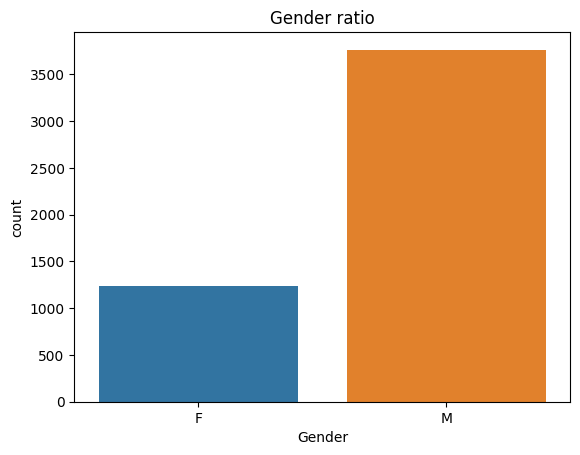

In [379]:
#비율 확인
print(f"{df['Gender'].value_counts()}")
sns.countplot(x="Gender",data=df)
plt.title("Gender ratio")
plt.show()

In [380]:
# 남성 : 0 , 여성 : 1
df['Gender'] = np.where(df['Gender']=='M',0,1)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P000,1,0-17,10,A,3,0,5,17.0,2010
1,P003,1,0-17,10,A,1,0,7,8.0,4483
2,P000,1,0-17,10,A,1,0,1,4.0,7696
3,P001,1,0-17,10,A,3,0,2,4.0,16429
4,P001,1,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,P001,0,55+,7,C,1,1,1,16.0,11701
4994,P003,0,55+,1,C,1,1,8,8.0,2045
4995,P001,0,55+,13,C,3,1,1,6.0,4505
4996,P003,0,55+,0,C,2,1,12,8.0,1413


### 범주 컬럼 : Age, city_category, Occupation, Matarial_status, Product_Category_1, Product_Category_2

In [381]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4')
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years','Product_ID','Gender','City_Category','Age','Occupation','Marital_Status','Product_Category_1','Product_Category_2'])

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 83 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Purchase                      4998 non-null   int64
 1   Stay_In_Current_City_Years_0  4998 non-null   uint8
 2   Stay_In_Current_City_Years_1  4998 non-null   uint8
 3   Stay_In_Current_City_Years_2  4998 non-null   uint8
 4   Stay_In_Current_City_Years_3  4998 non-null   uint8
 5   Stay_In_Current_City_Years_4  4998 non-null   uint8
 6   Product_ID_P000               4998 non-null   uint8
 7   Product_ID_P001               4998 non-null   uint8
 8   Product_ID_P002               4998 non-null   uint8
 9   Product_ID_P003               4998 non-null   uint8
 10  Product_ID_P009               4998 non-null   uint8
 11  Gender_0                      4998 non-null   uint8
 12  Gender_1                      4998 non-null   uint8
 13  City_Category_A               499

In [383]:
df

,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Product_ID_P000,Product_ID_P001,Product_ID_P002,Product_ID_P003,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,2010,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4483,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7696,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16429,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5780,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11701,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4994,2045,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4995,4505,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,1413,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model

In [390]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [391]:
y = df['Purchase']
x = df.drop('Purchase',axis=1)

In [392]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)

100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


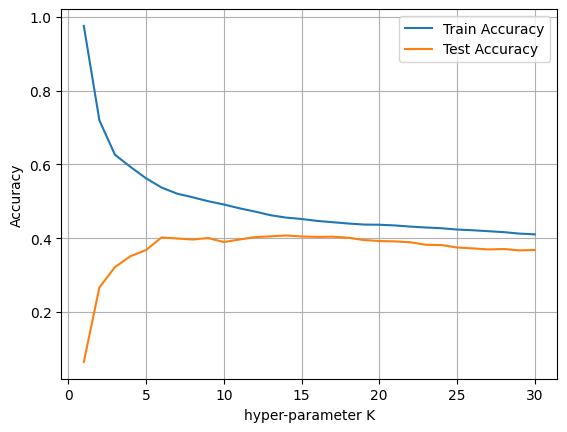

In [400]:
from tqdm import tqdm

train_accuracy = []
test_accuracy = []

for k in tqdm(range(1, 31)):
    model = KNeighborsRegressor(n_neighbors = k, p = 2)    
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))     
    test_accuracy.append(model.score(x_test, y_test))   

plt.plot(range(1,31), train_accuracy, label = "Train Accuracy")
plt.plot(range(1,31), test_accuracy, label = "Test Accuracy")
plt.xlabel("hyper-parameter K")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()
